In [ ]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#tampilkan data csv
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#pilih data yang akan dipakai
dt = data.loc[:,["Age","BloodPressure","Glucose","BMI"]]
dt

,Age,BloodPressure,Glucose,BMI
0,50,72,148,33.6
1,31,66,85,26.6
2,32,64,183,23.3
3,21,66,89,28.1
4,33,40,137,43.1
...,...,...,...,...
763,63,76,101,32.9
764,27,70,122,36.8
765,30,72,121,26.2
766,47,60,126,30.1


In [ ]:
#filter 100 data yang digunakan
dt=dt.head(100)
dt

,Age,BloodPressure,Glucose,BMI
0,50,72,148,33.6
1,31,66,85,26.6
2,32,64,183,23.3
3,21,66,89,28.1
4,33,40,137,43.1
...,...,...,...,...
95,40,72,144,33.9
96,24,62,92,31.6
97,22,48,71,20.4
98,23,50,93,28.7


In [ ]:
#melihat informasi data yang dipakai
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            100 non-null    int64  
 1   BloodPressure  100 non-null    int64  
 2   Glucose        100 non-null    int64  
 3   BMI            100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [ ]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
dt.describe()

,Age,BloodPressure,Glucose,BMI
count,100.000000,100.000000,100.000000,100.000000
mean,34.420000,68.070000,117.940000,30.996000
std,11.212529,22.009298,33.712636,9.611734
min,21.000000,0.000000,0.000000,0.000000
25%,25.750000,64.000000,99.000000,25.300000
50%,31.000000,72.000000,112.500000,31.800000
75%,42.000000,80.000000,139.000000,37.225000
max,60.000000,110.000000,197.000000,49.700000


In [ ]:
#ubah tipe data dari float ke integer
dt['BMI'] = dt['BMI'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# tampilkan data setelah diubah tipe datanya
dt

,Age,BloodPressure,Glucose,BMI
0,50,72,148,33
1,31,66,85,26
2,32,64,183,23
3,21,66,89,28
4,33,40,137,43
...,...,...,...,...
95,40,72,144,33
96,24,62,92,31
97,22,48,71,20
98,23,50,93,28


<Figure size 720x576 with 0 Axes>

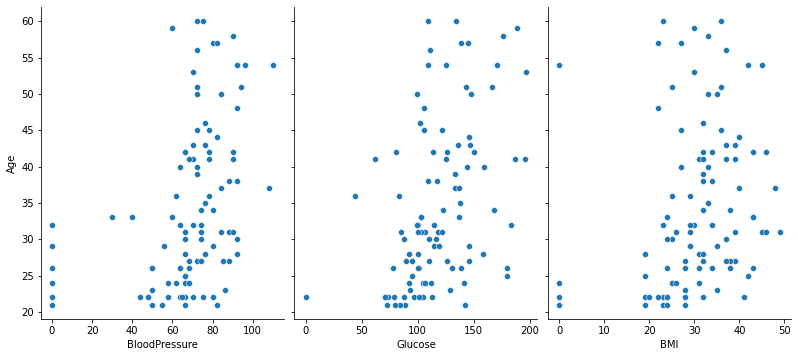

In [ ]:
#visualisasi data yang dimiliki
plt.figure(figsize=(10,8))
sns.pairplot(data=dt, x_vars=['BloodPressure', 'Glucose', 'BMI'], 
             y_vars=['Age'], 
             height=5, aspect=0.75)

In [ ]:
#Mengetahui nilai korelasi 
dt.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,Age,BloodPressure,Glucose,BMI
Age,1.00,0.41,0.43,0.21
BloodPressure,0.41,1.00,0.26,0.39
Glucose,0.43,0.26,1.00,0.27
BMI,0.21,0.39,0.27,1.00


In [ ]:
#Mengetahui nilai korelasi 
dt.corr()

,Age,BloodPressure,Glucose,BMI
Age,1.000000,0.406327,0.433204,0.214613
BloodPressure,0.406327,1.000000,0.260634,0.392701
Glucose,0.433204,0.260634,1.000000,0.270965
BMI,0.214613,0.392701,0.270965,1.000000


In [ ]:
#buat variabel x dan y.
x = dt.drop(columns='Age')
y = dt['Age']
#split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#bikin object linear regresi.
lin_reg = LinearRegression()
#train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)
#cari tau nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[0.15630502 0.08061903 0.01466604]
13.48847136038778


In [ ]:
#mencari nilai accuracy score dari model kita menggunakan testing data yang sudah displit sebelumnya.
lin_reg.score(x_test, y_test)

0.36692692532165283

In [ ]:
lin_reg.coef_

array([0.15630502, 0.08061903, 0.01466604])

In [ ]:
#melakukan prediksi
lin_reg.predict([[45,56,72]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([26.09281793])